In [41]:
import re
import os
def getEpochLoss(data):
    pattern = r"Epoch (\d+)/\d+,\sLoss: ([\d.]+)"
    matches = re.findall(pattern, data)
    if matches:
        epoch = matches[0][0]
        loss = matches[0][1]
        return epoch,loss
    return None,None

log_folder = '../log'
# 获取log文件夹下的所有文件
log_files = [f for f in os.listdir(log_folder) if os.path.isfile(os.path.join(log_folder, f))]
dict = {}
for file_name in log_files:
    parts = file_name.split("_")
    if file_name.count('_') != 5: continue
    file_path = os.path.join(log_folder, file_name)
    new_key_name = "_".join(parts[:4])
    if new_key_name not in dict:
        dict[new_key_name] = []
    if 'loss' in file_name:
        with open(file_path, 'r') as file:
             lines = file.readlines()
             epoches = []
             losses = []
             for line in lines:
                 epoch,loss = getEpochLoss(line)
                 if epoch is not None and loss is not None:
                     epoches.append(epoch)
                     losses.append(loss)
             dict[new_key_name].append(losses)

print(dict)
data = []
epoch_num = len(dict[list(dict.keys())[0]][0])
for key in dict:
    parts = key.split("_")
    large_batch = int(parts[2])  # 提取大批量大小并将其转换为整数
    small_batch = int(parts[3])  # 提取小批量大小并将其转换为整数
    avg_down = len(dict[key])
    epoches = []
    print(key)
    print(dict[key])
    for i in range(epoch_num):
        cur = 0
        for j in range(len(dict[key])): # 5 avg 5
            cur += float(dict[key][j][i])
        cur /= len(dict[key])
        epoches.append(cur)
    data.append([[large_batch,small_batch],epoches])

print(data)

{'resnet50_cifar10_256_256': [['2.3511776679601426', '2.2880434684264355', '2.239294360234187', '2.195037858914106', '2.152916799447475', '2.1120558897654216', '2.07191797158657', '2.0321335462423473', '1.9925550344662788', '1.9531626334557166'], ['2.3511776679601426', '2.2880434684264355', '2.239294360234187', '2.195037858914106', '2.152916799447475', '2.1120558897654216', '2.07191797158657', '2.0321335462423473', '1.9925550344662788', '1.9531626334557166'], ['2.3511776679601426', '2.2880434684264355', '2.239294360234187', '2.195037858914106', '2.152916799447475', '2.1120558897654216', '2.07191797158657', '2.0321335462423473', '1.9925550344662788', '1.9531626334557166'], ['2.3511776679601426', '2.2880434684264355', '2.239294360234187', '2.195037858914106', '2.152916799447475', '2.1120558897654216', '2.07191797158657', '2.0321335462423473', '1.9925550344662788', '1.9531626334557166'], ['2.3511776679601426', '2.2880434684264355', '2.239294360234187', '2.195037858914106', '2.152916799447

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2.3511776679601426, 2.2880434684264355, 2.239294360234187, 2.195037858914106, 2.152916799447475, 2.1120558897654216, 2.07191797158657, 2.0321335462423473, 1.9925550344662788, 1.9531626334557166]
[2.352283980296208, 2.2882478915728055, 2.2387631226808598, 2.194012408378797, 2.1515029784960626, 2.110339544980954, 2.069985160460839, 2.0302005382684563, 1.9909990790562753, 1.9523448989941525]
[2.3532555155265027, 2.2882847993801803, 2.238056825674497, 2.192872744034498, 2.1500922637108046, 2.1089009792376787, 2.068891840867507, 2.0298387432709717, 1.991611481629885, 1.9541238848979656]
[2.355346332910733, 2.290629614010835, 2.238820179609152, 2.192159964488103, 2.148732067682804, 2.107588031200262, 2.068140583542677, 2.0300079735425802, 1.9929564197858174, 1.956815934028381]


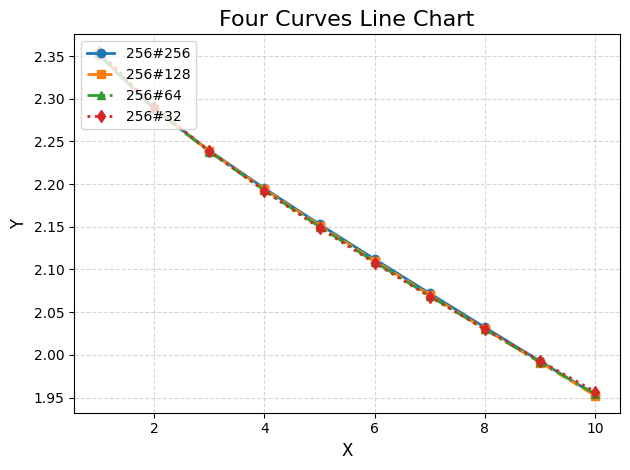

In [42]:
import matplotlib.pyplot as plt
# # test 曲线数据
# x = [1, 2, 3, 4, 5]  # x轴数据
# y1 = [1, 4, 9, 16, 25]  # 曲线1的y轴数据
# y2 = [1, 2, 4, 8, 16]  # 曲线2的y轴数据
# y3 = [1, 3, 5, 7, 9]  # 曲线3的y轴数据
# y4 = [2, 4, 6, 8, 10]  # 曲线4的y轴数据
x = [i for i in range(1,epoch_num+1)]
y1 = [float(x) for x in data[0][1]]
y2 = [float(x) for x in data[1][1]]
y3 = [float(x) for x in data[2][1]]
y4 = [float(x) for x in data[3][1]]
print(x)
print(y1)
print(y2)
print(y3)
print(y4)

# 绘制折线图
plt.plot(x, y1, label=f'{data[0][0][0]}#{data[0][0][1]}', marker='o', linestyle='-', linewidth=2)
plt.plot(x, y2, label=f'{data[1][0][0]}#{data[1][0][1]}', marker='s', linestyle='--', linewidth=2)
plt.plot(x, y3, label=f'{data[2][0][0]}#{data[2][0][1]}', marker='^', linestyle='-.', linewidth=2)
plt.plot(x, y4, label=f'{data[3][0][0]}#{data[3][0][1]}', marker='d', linestyle=':', linewidth=2)

# 图表标题和坐标轴标签
plt.title('Four Curves Line Chart', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)

# 坐标轴刻度标签字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 设置图例位置和样式
plt.legend(loc='upper left', fontsize=10)

# 网格线
plt.grid(True, linestyle='--', alpha=0.5)

# 调整图表边距
plt.tight_layout()

plt.savefig('loss2_static.pdf')

# 显示图表
plt.show()
